In [ ]:
# Import the dataset from a CSV file
import pandas as pd

df = pd.read_csv('/car_price_dataset 2.csv')
df

# Display the first 5 rows of the dataset
df.head()


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [ ]:
# Display the number of missing values in each column
print(df.isnull().sum())

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


In [ ]:
# Display summary statistics for each numerical column in the DataFrame
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Defining a function to remove outliers using the IQR method for selected columns
def remove_outliers(df, columns, factor=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Selecting all numeric columns in the dataset
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Removing outliers from the dataset using the defined function
df_clean = remove_outliers(df, numeric_cols)
# Printing the number of observations before and after removing outliers
print("Original number of observations:", df.shape[0])
print("Number of observations after removing outliers:", df_clean.shape[0])

Original number of observations: 10000
Number of observations after removing outliers: 9994


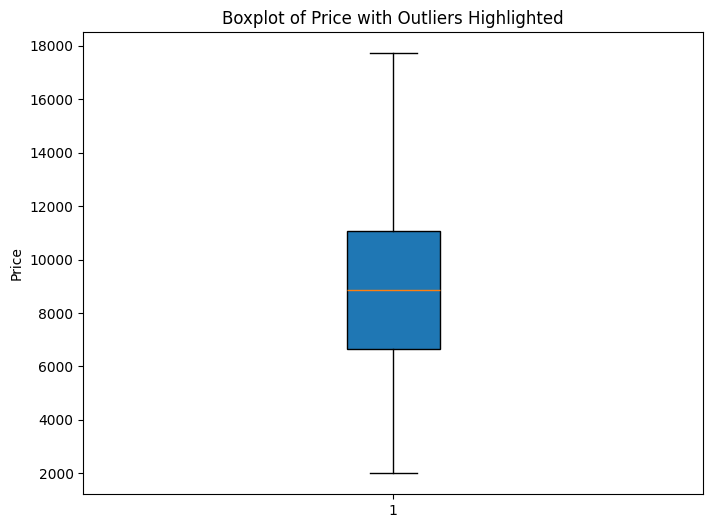

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Creating a boxplot to visualize outliers in the 'Price' column
plt.figure(figsize=(8, 6))
plt.boxplot(df_clean['Price'].dropna(),
            patch_artist=True,
            showfliers=True,
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'))  # Styling for outliers
plt.title('Boxplot of Price with Outliers Highlighted')
plt.ylabel('Price')
plt.show()


In [ ]:
# Displaying summary statistics for the cleaned dataset
df_clean.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2011.537823,2.999590,149321.466680,3.496498,2.990694,8847.447969
std,6.895499,1.148962,86282.667676,1.110090,1.422755,3105.371856
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.000000
25%,2006.000000,2.000000,74760.000000,3.000000,2.000000,6644.500000
50%,2012.000000,3.000000,149674.000000,3.000000,3.000000,8857.000000
75%,2017.000000,4.000000,223627.750000,4.000000,4.000000,11081.000000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,17719.000000


In [ ]:
# Creating a frequency table for the 'Brand' column
# This counts how many times each brand appears in the dataset
import pandas as pd

brand_freq = df_clean ['Brand'].value_counts().reset_index()
brand_freq.columns = ['Brand', 'Frequency']

# Displaying the frequency table
brand_freq

,Brand,Frequency
0,Ford,1047
1,Audi,1037
2,Volkswagen,1020
3,Honda,1007
4,Chevrolet,1003
5,BMW,999
6,Hyundai,994
7,Kia,976
8,Toyota,969
9,Mercedes,942


In [ ]:
# Creating a frequency table for the 'Model' column
# This counts how many times each car model appears in the dataset
import pandas as pd

model_freq = df_clean['Model'].value_counts().reset_index()
model_freq.columns = ['Model', 'Frequency']

# Displaying the frequency table
model_freq

,Model,Frequency
0,Accord,364
1,Fiesta,363
2,Impala,355
3,5 Series,353
4,Tiguan,352
5,Focus,351
6,Q5,350
7,A4,350
8,Elantra,346
9,Golf,339


In [ ]:
# Creating a frequency table for the 'Fuel_Type' column
# This counts the number of occurrences of each fuel type in the dataset
import pandas as pd

fuel_freq = df_clean['Fuel_Type'].value_counts().reset_index()
fuel_freq.columns = ['Fuel_Type', 'Frequency']

# Displaying the frequency table
fuel_freq

,Fuel_Type,Frequency
0,Electric,2621
1,Diesel,2512
2,Hybrid,2451
3,Petrol,2410


In [ ]:
# Creating a frequency table for the 'Transmission' column
# Counting occurrences of each transmission type in the dataset
import pandas as pd

transmission_freq = df_clean['Transmission'].value_counts().reset_index()
transmission_freq.columns = ['Transmission', 'Frequency']

# Displaying the frequency table
transmission_freq

,Transmission,Frequency
0,Manual,3372
1,Automatic,3311
2,Semi-Automatic,3311


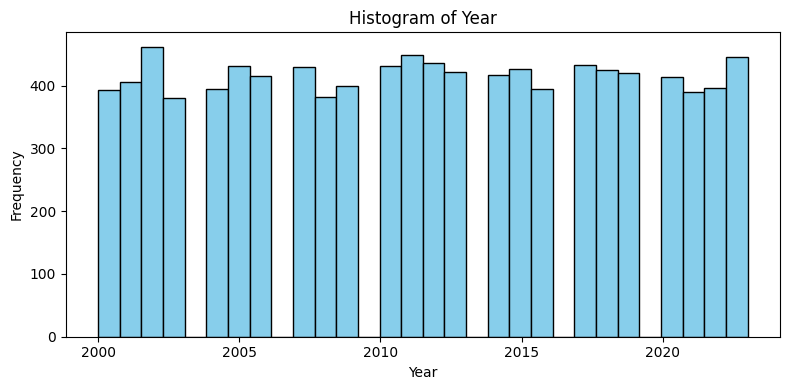

In [ ]:
# Creating a histogram to visualize the distribution of the 'Year' column
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(df_clean['Year'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

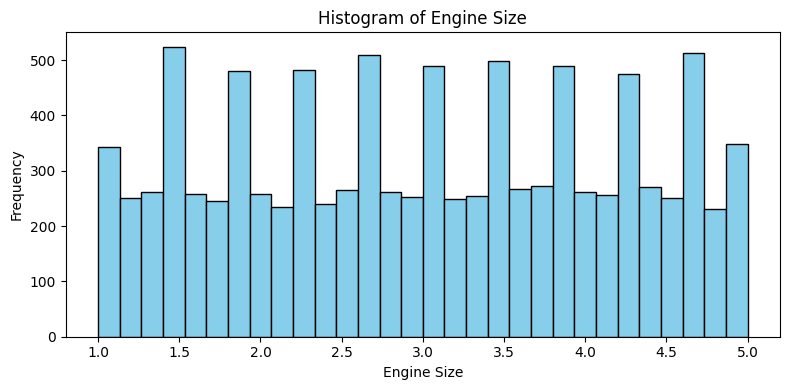

In [ ]:
# Creating a histogram to visualize the distribution of 'Engine_Size'
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(df_clean['Engine_Size'].dropna(), bins=30, color='skyblue', edgecolor='black')  # Dropping missing values
plt.title('Histogram of Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

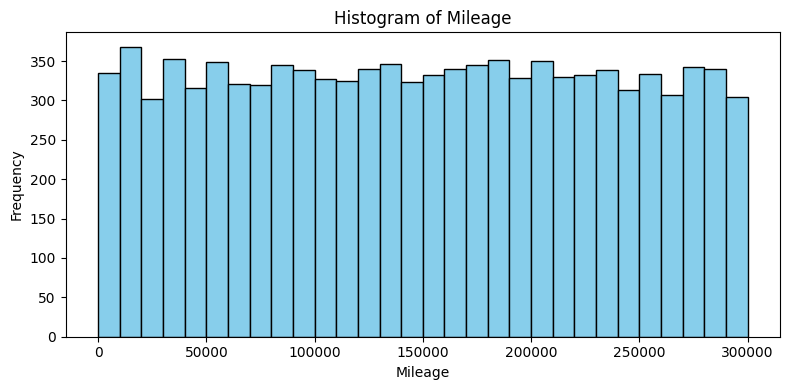

In [ ]:
# Creating a histogram to visualize the distribution of 'Mileage'
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(df_clean['Mileage'].dropna(), bins=30, color='skyblue', edgecolor='black')  # Removing missing values
plt.title('Histogram of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


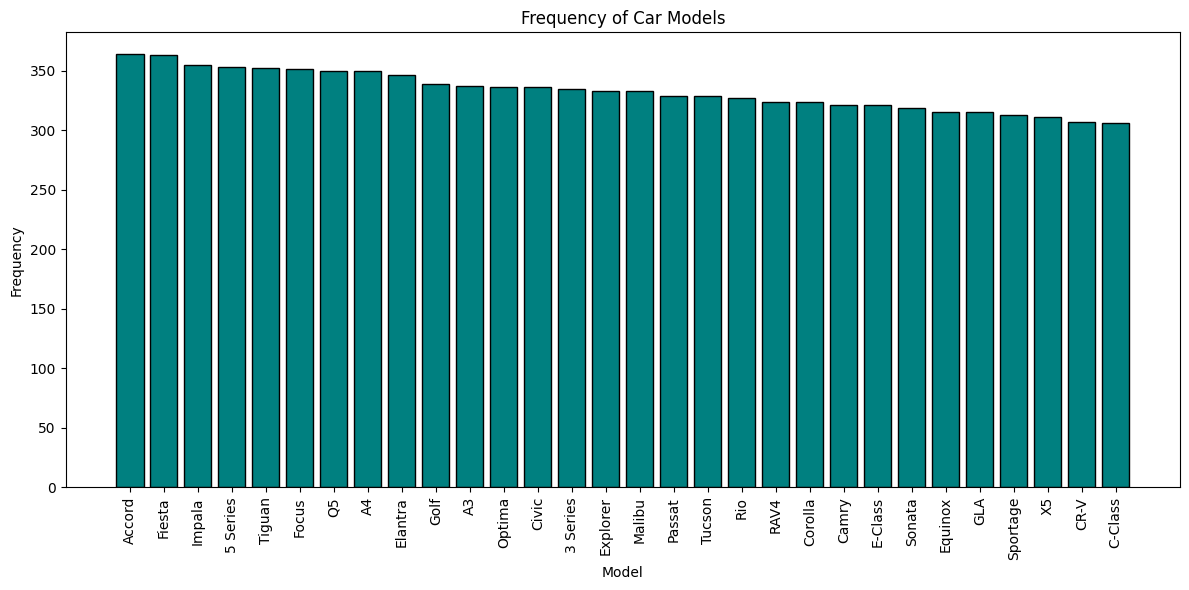

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculating frequency counts for each 'Model'
model_counts = df_clean['Model'].value_counts()

# Creating a bar plot to visualize the frequency distribution of car models
plt.figure(figsize=(12, 6))
plt.bar(model_counts.index, model_counts.values, color='teal', edgecolor='black')
plt.title('Frequency of Car Models')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


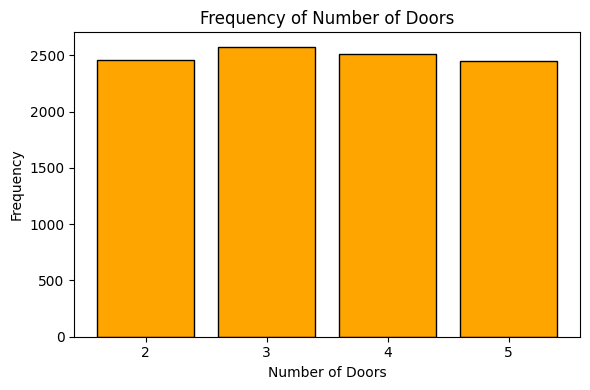

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculating frequency counts for each unique number of doors
doors_counts = df_clean['Doors'].value_counts().sort_index()

# Creating a bar plot to visualize the frequency distribution of number of doors
plt.figure(figsize=(6, 4))
plt.bar(doors_counts.index.astype(str), doors_counts.values, color='orange', edgecolor='black')
plt.title('Frequency of Number of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


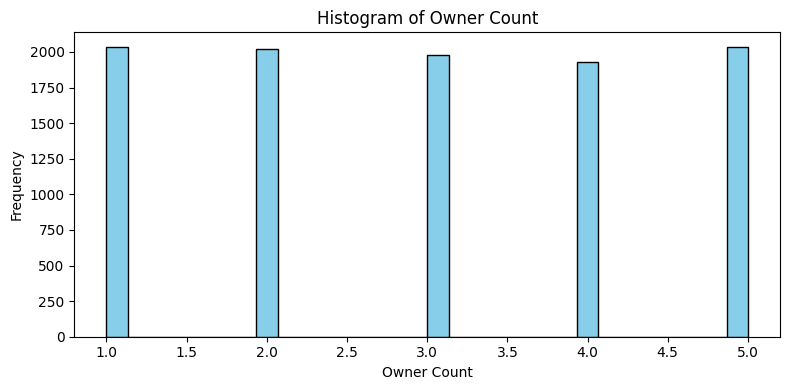

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a histogram to visualize the distribution of 'Owner_Count'
plt.figure(figsize=(8, 4))
plt.hist(df['Owner_Count'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Owner Count')
plt.xlabel('Owner Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

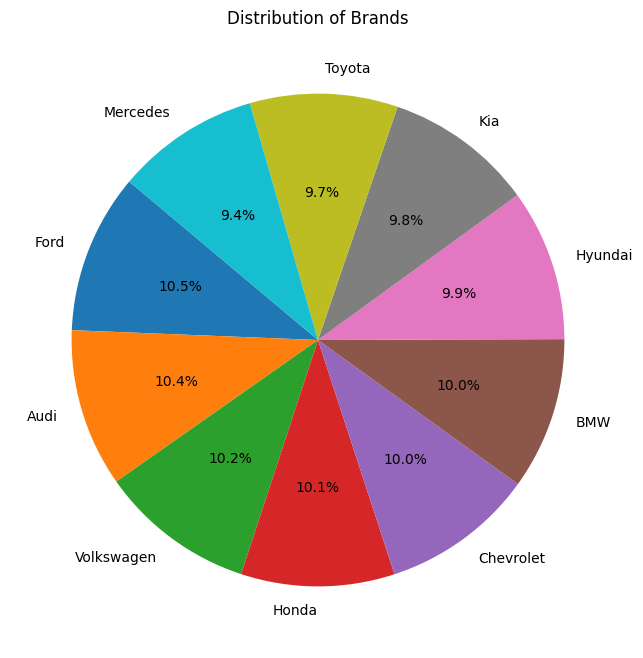

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculating frequency counts for each 'Brand'
brand_counts = df_clean['Brand'].value_counts()

# Creating a pie chart to visualize the brand distribution
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Brands')
plt.show()


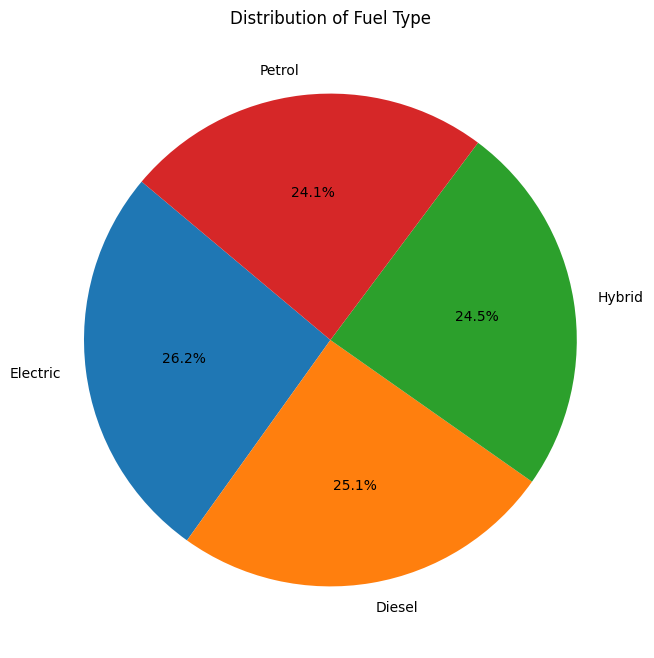

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculating frequency counts for 'Fuel_Type'
fuel_counts = df_clean['Fuel_Type'].value_counts()

# Creating a pie chart to visualize the distribution of fuel types
plt.figure(figsize=(8, 8))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fuel Type')
plt.show()


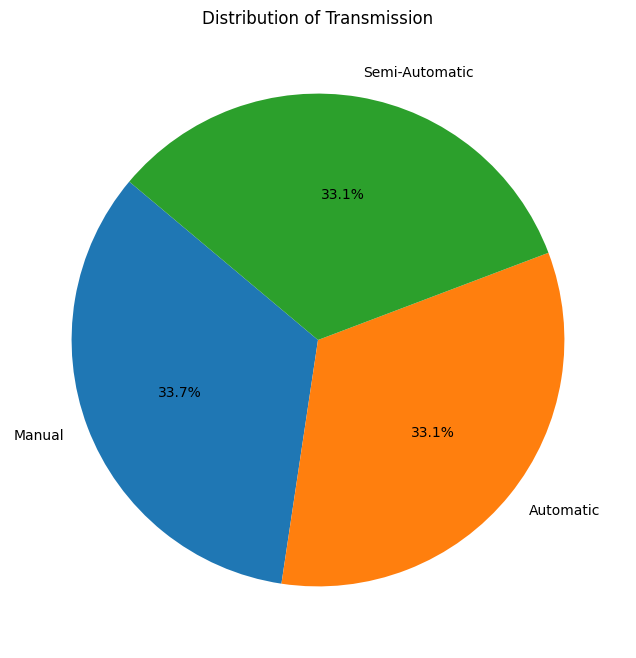

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculating frequency counts for 'Transmission'
transmission_counts = df_clean['Transmission'].value_counts()

# Creating a pie chart to visualize the distribution of transmission types
plt.figure(figsize=(8, 8))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transmission')
plt.show()


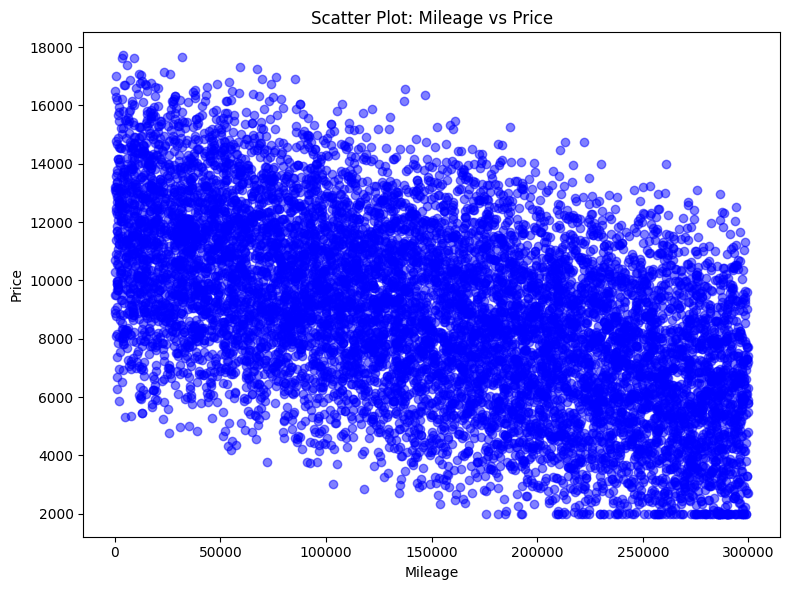

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a scatter plot to explore the relationship between Mileage and Price
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Mileage'], df_clean['Price'], color='blue', alpha=0.5)
plt.title('Scatter Plot: Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


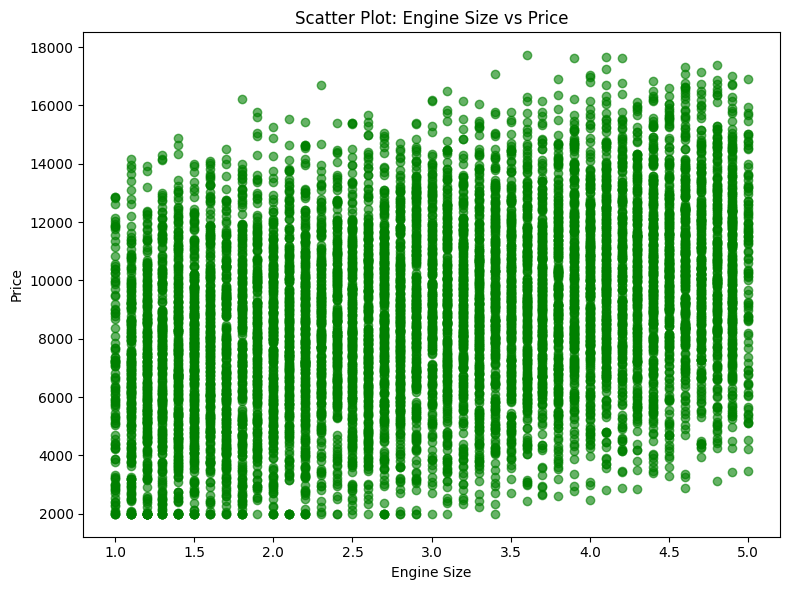

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a scatter plot to explore the relationship between Engine Size and Price
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Engine_Size'], df_clean['Price'], color='green', alpha=0.6)
plt.title('Scatter Plot: Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


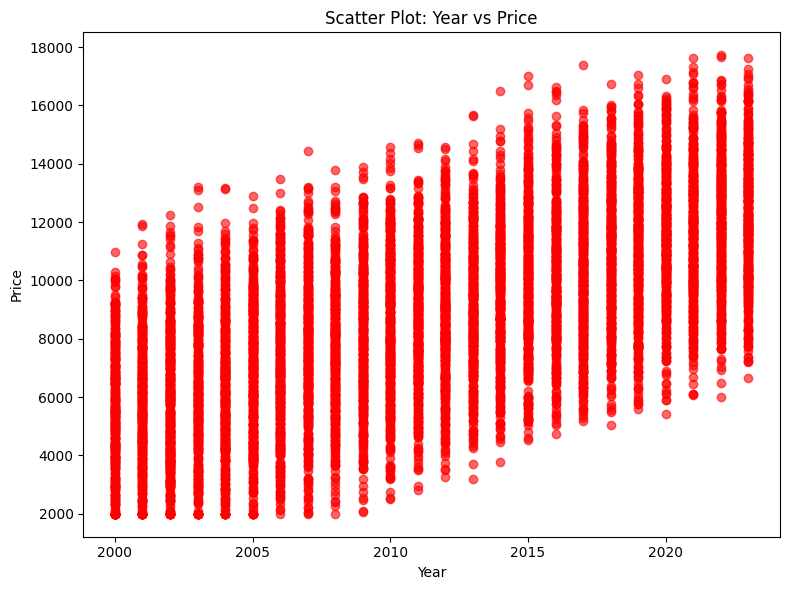

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a scatter plot to examine the relationship between Year and Price
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Year'], df_clean['Price'], color='red', alpha=0.6)
plt.title('Scatter Plot: Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


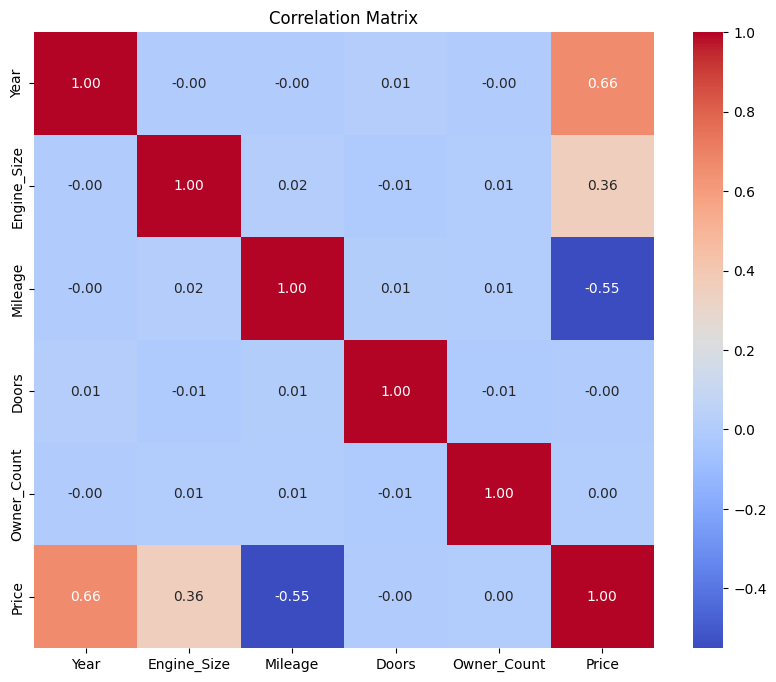

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numerical variables from the dataframe
numeric_df = df_clean.select_dtypes(include=['number'])

# Calculating the correlation matrix for numeric variables
corr = numeric_df.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
import pandas as pd

# Define the dependent variable (target) - Price
y = df_clean['Price']

# Select explanatory variables (features) - all variables except 'Price'
X = df_clean.drop('Price', axis=1)

# Identify categorical variables
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# For each categorical variable, create dummy (one-hot encoded) variables and add them to the DataFrame
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print(X.dtypes.unique())


[dtype('int64') dtype('float64') dtype('bool')]


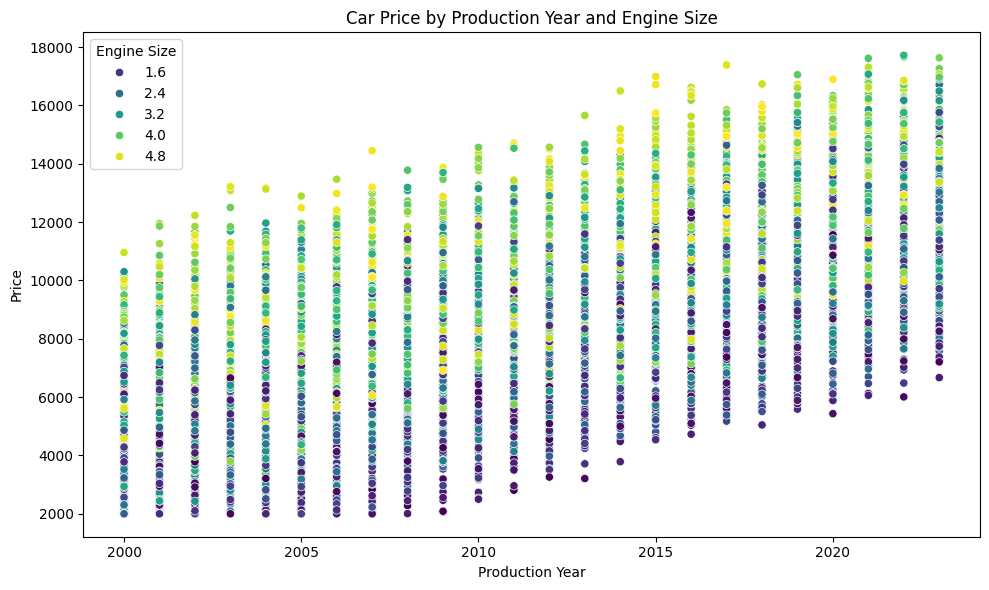

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame for visualization by combining features and the target variable (Price)
df_plot = X.copy()
df_plot['Price'] = y

# Plotting a scatterplot showing the relationship between car production year and price,
# using color to represent engine size.
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_plot, x='Year', y='Price', hue='Engine_Size', palette='viridis')
plt.title('Car Price by Production Year and Engine Size')
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.legend(title='Engine Size')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Train target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Train set shape: (7995, 48)
Test set shape: (1999, 48)
Train target shape: (7995,)
Test target shape: (1999,)


In [ ]:
# Creating a new interaction feature by multiplying 'Year' and 'Engine_Size'
X_train['Year_Engine'] = X_train['Year'] * X_train['Engine_Size']
X_test['Year_Engine'] = X_test['Year'] * X_test['Engine_Size']

# Convert all variables to numeric float types (as required by OLS regression)
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)


In [38]:
import statsmodels.api as sm

# Ensure there are no duplicated columns in the training data
X_train = X_train.loc[:, ~X_train.columns.duplicated()]

X_train_loop = X_train.copy()
removed_vars = []

# Iterative variable elimination based on highest p-value
while True:
    X_train_loop = X_train_loop.drop(columns=[col for col in X_train_loop.columns if col == 'const'], errors='ignore')

    X_train_loop = sm.add_constant(X_train_loop, has_constant='add')

    # Fit OLS regression model
    model = sm.OLS(y_train, X_train_loop).fit()

    p_values = model.pvalues.drop('const')
    max_pval = p_values.max()
    max_pval_var = p_values.idxmax()

    # Check if the highest p-value exceeds the significance threshold (0.05)
    if max_pval > 0.05:
        print(f"Variable removed: '{max_pval_var}' (p-value = {max_pval:.4f})")
        X_train_loop = X_train_loop.drop(columns=[max_pval_var])
        removed_vars.append(max_pval_var)
    else:
        print("All variables are significant. Loop ended. ")
        break

# Fit the final model after variable elimination
final_model = sm.OLS(y_train, X_train_loop).fit()

# Display the summary of the final model
print(final_model.summary())


Variable removed: 'Fuel_Type_Petrol' (p-value = 0.8510)
Variable removed: 'Doors' (p-value = 0.8367)
Variable removed: 'Model_X5' (p-value = 0.6780)
Variable removed: 'Owner_Count' (p-value = 0.4006)
Variable removed: 'Model_5 Series' (p-value = 0.2479)
All variables are significant. Loop ended. 
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.293e+05
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:46:00   Log-Likelihood:                -46674.
No. Observations:                7995   AIC:                         9.342e+04
Df Residuals:                    7960   BIC:                         9.366e+04
Df Model:                          34                                 

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the test set to match the final model structure
X_test_loop = X_test.loc[:, ~X_test.columns.duplicated()]
X_test_loop = X_test_loop.drop(columns=[col for col in X_test_loop.columns if col == 'const'], errors='ignore')
X_test_loop = X_test_loop[X_train_loop.columns.drop('const')]
X_test_loop = sm.add_constant(X_test_loop, has_constant='add')

# Step 2: Predict prices using the final model
y_pred = final_model.predict(X_test_loop)
print(y_pred)


3127     9582.623059
1443     9400.072232
4512     8682.102008
39       4458.898227
4511    13487.946196
            ...     
9962    13388.029381
1563     5399.838933
1672     7778.981100
6954     8349.292924
3912    10680.407083
Length: 1999, dtype: float64


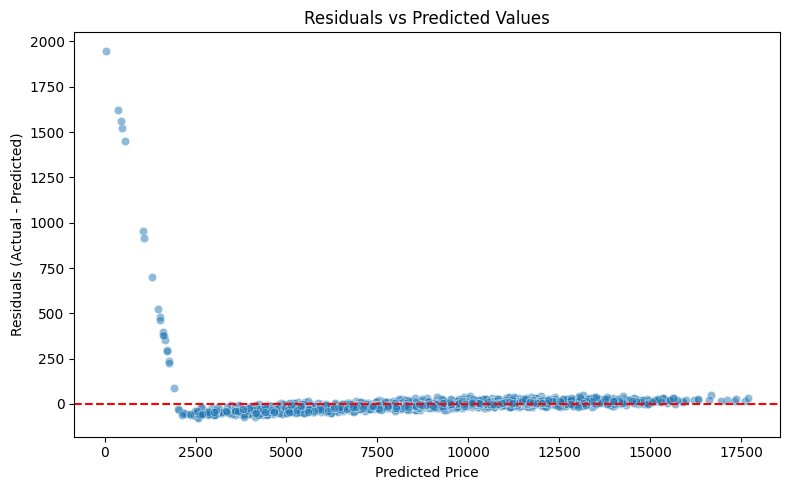

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals (difference between actual and predicted values)
residuals = y_test - y_pred

# Plotting residuals vs predicted values
plt.figure(figsize=(8, 5)) # Set figure size
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Print results
print("RMSE:", rmse)
print("R-squared on test set:", r2)


RMSE: 94.77499458555629
R-squared on test set: 0.9990458685661155


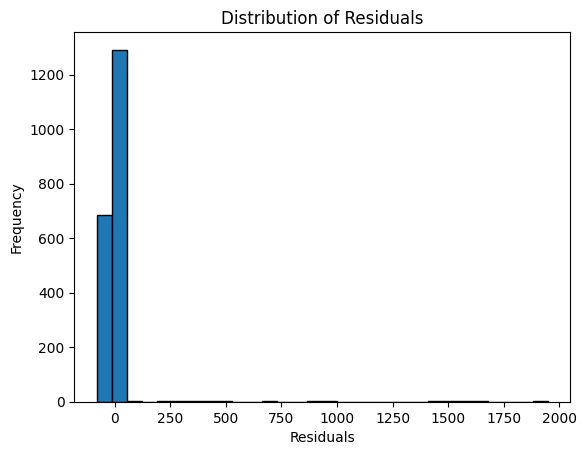

In [ ]:
# Residual analysis using a histogram
residuals = y_test - y_pred

# Plot the distribution of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Displaying actual vs. predicted values (preview of the top of the table)
predictions_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})
predictions_df.head()


,Actual Price,Predicted Price
3127,9576,9582.623059
1443,9403,9400.072232
4512,8676,8682.102008
39,4411,4458.898227
4511,13481,13487.946196
